In [80]:
pwd

'/Users/daniellejenkins17/Documents/GitHub/Banknote-Classification-Project'

In [177]:
#UCI banknote authentication Data Set

import pandas as pd 
import numpy as np
import matplotlib as plt 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

df = pd.read_csv('/Users/daniellejenkins17/Downloads/data_banknote_authentication.txt', delimiter =',')

In [152]:
#Variance is the changes in the model when using different portions of the training data set
#Assess model variance with cross validation
#Variance comes from highly complex models with a large number of features

#Entropy: a measure of heterogeneity
    
#Skewness and Kurtosis: 
#Skewness is the degree of distortion or deviation from the symmetrical normal distribution. 
#Skewness can calculate the lack of symmetry in the data. 

#- A skewness between -0.5 and 0.5 means that the data are pretty symmetrical
#- A skewness between -1 and -0.5 (negatively skewed) or between 0.5 and 1 (positively skewed) means that 
#  the data are moderately skewed.
#- A skewness smaller than -1 (negatively skewed) or bigger than 1 (positively skewed) means that the data 
#  are highly skewed.

#Kurtosis deals with the lengths of tails in the distribution...it's a measure of outliers...high kurtosis 
#means a lot of outliers...investigate why

In [119]:
df

#1. variance of Wavelet Transformed image (continuous) 
#2. skewness of Wavelet Transformed image (continuous) 
#3. curtosis of Wavelet Transformed image (continuous) 
#4. entropy of image (continuous) 
#5. class (integer) 

#In the Banknote Authentication dataset, class 0 is “genuine/authentic” and class 1 is “forgery/fake”

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


In [120]:
df.info

<bound method DataFrame.info of        3.6216    8.6661  -2.8073  -0.44699  0
0     4.54590   8.16740  -2.4586  -1.46210  0
1     3.86600  -2.63830   1.9242   0.10645  0
2     3.45660   9.52280  -4.0112  -3.59440  0
3     0.32924  -4.45520   4.5718  -0.98880  0
4     4.36840   9.67180  -3.9606  -3.16250  0
...       ...       ...      ...       ... ..
1366  0.40614   1.34920  -1.4501  -0.55949  1
1367 -1.38870  -4.87730   6.4774   0.34179  1
1368 -3.75030 -13.45860  17.5932  -2.77710  1
1369 -3.56370  -8.38270  12.3930  -1.28230  1
1370 -2.54190  -0.65804   2.6842   1.19520  1

[1371 rows x 5 columns]>

In [121]:
df.head()

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [122]:
df.mean()

3.6216      0.431410
8.6661      1.917434
-2.8073     1.400694
-0.44699   -1.192200
0           0.444931
dtype: float64

In [123]:
df.median()

3.6216      0.49571
8.6661      2.31340
-2.8073     0.61663
-0.44699   -0.58665
0           0.00000
dtype: float64

In [124]:
#renaming columns 

df.columns = ['Variance', 'Skewness', "Kurtosis", "Entropy", "Authentic_Fake"]
df

,Variance,Skewness,Kurtosis,Entropy,Authentic_Fake
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


In [125]:
#Tasks: 

#Train test split 

#make plots of visualizations: 

#Class vs Variance 
#Class vs Skewness 
#Class vs Kurtosis
#Class vs Entropy 

#read the lab notes and take notes
#make notes in EN from my black notebook from today 

In [126]:
df.Authentic_Fake.value_counts()

0    761
1    610
Name: Authentic_Fake, dtype: int64

In [127]:
df.Authentic_Fake.value_counts(normalize = True)

0    0.555069
1    0.444931
Name: Authentic_Fake, dtype: float64

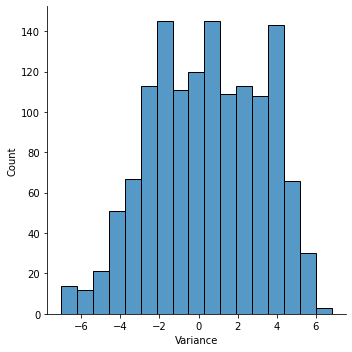

In [128]:
sns.displot(df['Variance'])

#all banknotes

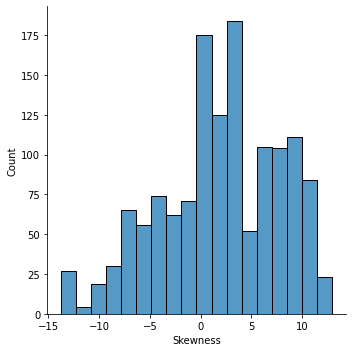

In [129]:
sns.displot(df['Skewness'])

#all banknotes

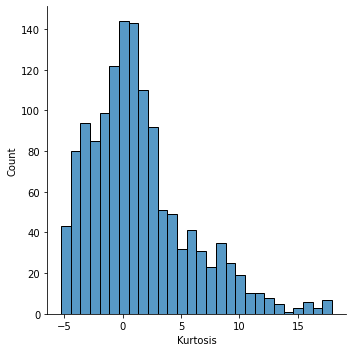

In [130]:
sns.displot(df['Kurtosis'])

#all banknotes

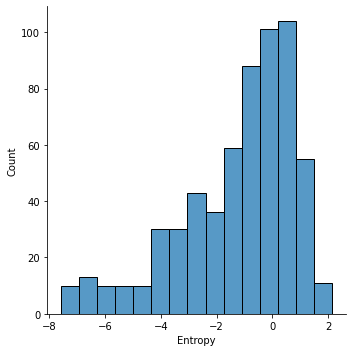

In [131]:
sns.displot(df[df['Authentic_Fake'] == 1]['Entropy'])

#Fake checks 

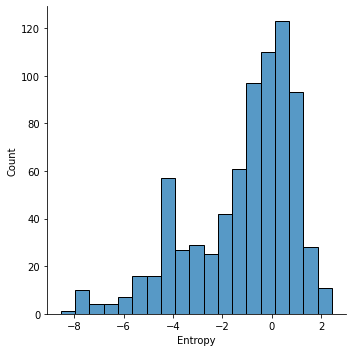

In [132]:
sns.displot(df[df['Authentic_Fake'] == 0]['Entropy'])

#Authentic checks 

<AxesSubplot:xlabel='Entropy', ylabel='Kurtosis'>

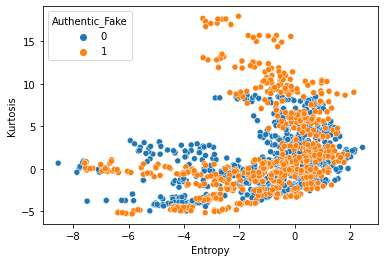

In [133]:
sns.scatterplot(data = df, x = 'Entropy', y = 'Kurtosis', hue = 'Authentic_Fake')

<AxesSubplot:xlabel='Entropy', ylabel='Skewness'>

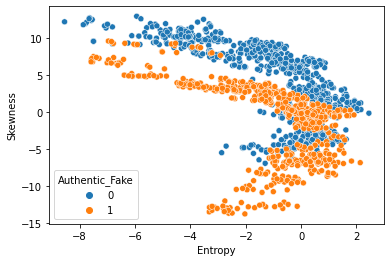

In [134]:
sns.scatterplot(data = df, x = 'Entropy', y = 'Skewness', hue = 'Authentic_Fake')

In [135]:
sns.scatterplot(data = df, x = 'Kurtosis', y = 'Skewness
                ', hue = 'Authentic_Fake')

SyntaxError: EOL while scanning string literal (<ipython-input-135-a81c2ab211e2>, line 1)

In [ ]:
sns.scatterplot(data = df, x = 'Entropy', y = 'Variance', hue = 'Authentic_Fake')

In [ ]:
sns.scatterplot(data = df, x = 'Kurtosis', y = 'Variance', hue = 'Authentic_Fake')

In [ ]:
sns.scatterplot(data = df, x = 'Variance', y = 'Skewness', hue = 'Authentic_Fake')

In [ ]:
df

In [136]:
y = df['Authentic_Fake']
X = df.drop('Authentic_Fake', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=87)

In [137]:
X_train #75%

,Variance,Skewness,Kurtosis,Entropy
1203,-2.77230,3.2777,-0.93510,-3.145700
268,4.93420,2.4107,-0.17594,1.624500
472,2.82090,7.3108,-0.81857,-1.878400
557,4.38460,-4.8794,3.36620,-0.029324
1259,-3.00000,-9.1566,9.57660,-0.730180
...,...,...,...,...
1030,-1.85540,-9.6035,7.77640,-0.977160
1275,-0.89809,-4.4862,2.20090,0.507310
143,3.84810,10.1539,-3.85610,-4.222800
699,3.92620,6.0299,-2.01560,-0.065531


In [138]:
X_test #25%

,Variance,Skewness,Kurtosis,Entropy
933,-1.61760,1.0926,-0.35502,-0.599580
1043,-1.49040,-2.2183,1.60540,0.893940
102,3.33970,-4.6145,3.98230,-0.237510
227,3.12190,-3.1370,1.92590,-0.374580
180,-0.11783,-1.5789,8.03000,-0.028031
...,...,...,...,...
976,-1.23900,-6.5410,4.81510,-0.033204
386,4.63610,-2.6611,2.83580,1.199100
269,3.84170,10.0215,-4.26990,-4.915900
1253,-3.88940,-7.8322,9.82080,0.474980


In [139]:
y_train #75%

1203    1
268     0
472     0
557     0
1259    1
       ..
1030    1
1275    1
143     0
699     0
333     0
Name: Authentic_Fake, Length: 1028, dtype: int64

In [140]:
y_test  #25%

933     1
1043    1
102     0
227     0
180     0
       ..
976     1
386     0
269     0
1253    1
217     0
Name: Authentic_Fake, Length: 343, dtype: int64

In [141]:
from sklearn.linear_model import LogisticRegression

#baseline model 
#call this function for dec tree and random forest 

In [142]:
LogReg = LogisticRegression()

In [143]:
LogReg.fit(X_train, y_train)

LogisticRegression()

In [144]:
LogReg.score(X_train, y_train)  #accuracy score 

0.9892996108949417

In [165]:
#confusion matrix:

# get predictions
y_pred = LogReg.predict(X_test) 

# calculate confusion matrix
cfmat = confusion_matrix(y_test, y_pred) 

cfmat

array([[186,   1],
       [  1, 155]])

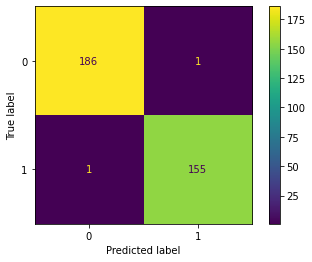

In [166]:
plot_confusion_matrix(LogReg, 
                      X_test, y_test)
plt.show()

In [168]:
tn, fp, fn, tp = cfmat.flatten()
print(tn,fn,fp,tp)

print(cfmat)

186 1 1 155
[[186   1]
 [  1 155]]


In [169]:
acc = (tp + tn) / (tp + tn + fp + fn)
print(acc)

0.9941690962099126


In [170]:
prec = tp/(tp+fp)
prec

0.9935897435897436

In [173]:
precision_score(y_test, y_pred)

0.9935897435897436

In [175]:
rec = tp / (tp + fn)
print(rec)

0.9935897435897436


In [176]:
recall_score(y_test, y_pred)

0.9935897435897436

In [178]:
f1_sc = 2*prec*rec / (prec + rec)
print(f1_sc)

0.9935897435897436


In [179]:
f1_score(y_pred, y_test)

#classification report gets all these at once 

0.9935897435897436

<AxesSubplot:xlabel='Variance', ylabel='Authentic_Fake'>

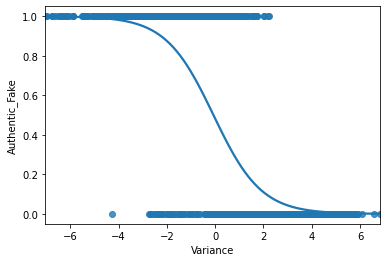

In [148]:
#These are just visualizations...not having to do with baseline model at all 

sns.regplot(x=X_train['Variance'], y=y_train, logistic=True, ci=None)

<AxesSubplot:xlabel='Skewness', ylabel='Authentic_Fake'>

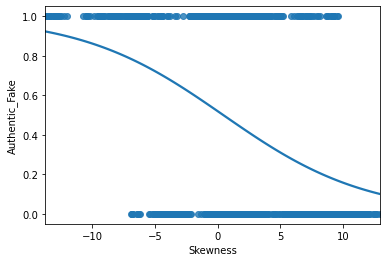

In [149]:
sns.regplot(x=X_train['Skewness'], y=y_train, logistic=True, ci=None)

<AxesSubplot:xlabel='Kurtosis', ylabel='Authentic_Fake'>

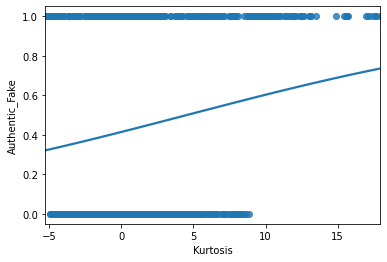

In [150]:
sns.regplot(x=X_train['Kurtosis'], y=y_train, logistic=True, ci=None)

#using coefficients to compare the target vs features: 
#spread is high, w is small, region is too wide

<AxesSubplot:xlabel='Entropy', ylabel='Authentic_Fake'>

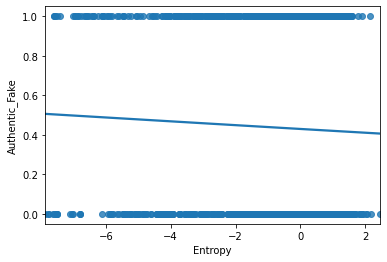

In [151]:
sns.regplot(x=X_train['Entropy'], y=y_train, logistic=True, ci=None)

In [185]:
#standard scaling of variables  (tuning the log reg model)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)

ss

StandardScaler()

ValueError: X has 2 features per sample; expecting 4

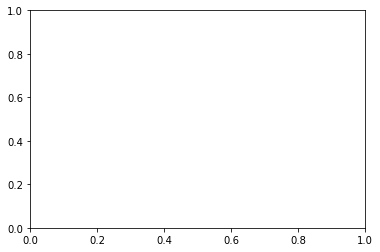

In [186]:
#min max scaler 

X_2Dn = X_train_scaled # scaled features
X_2D = X_train # features on original scale

x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1

xx_n, yy_n = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, ax = plt.subplots()

Z = LogReg.predict(np.c_[xx_n.ravel(), yy_n.ravel()])
Z = Z.reshape(xx_n.shape)
ax.contourf(xx_n, yy_n, Z, alpha=0.4)
ax.scatter(X_2Dn[:, 0], X_2Dn[:, 1], c = y_train, s=30, edgecolor="k")
ax.set_xlabel('bill depth [mm]')
ax.set_ylabel('body mass [g]')
ax.set_title('Decision Boundary: Logistic Regression')

plt.show()

In [187]:
#hyperparameter tuning on C 

C_list = [1e-4,1e-3, 1e-2, 1e-1, 1, 10, 100, 1e3]
cv_scores = []
cv_scores_std = []

for c in C_list:
    logreg = LogisticRegression(C = c) # using default lbfgs solver
    cv_loop_results = cross_validate(
                X=X_train_scaled, 
                y=y_train,
                estimator=logreg, 
                cv=8)
    cv_scores.append(np.mean(np.sqrt(np.abs(cv_loop_results['test_score']))))
    cv_scores_std.append(np.std(np.sqrt(np.abs(cv_loop_results['test_score']))))

NameError: name 'cross_validate' is not defined

In [188]:
final_pipe = Pipeline([('preprocess', ct),
                      ('model',
                       KNeighborsClassifier())])
final_pipe

NameError: name 'ct' is not defined

In [189]:
final_pipe_grid = {'preprocess__numpipe__numimputer__strategy': ["mean", "median"],
             'model__n_neighbors': [3, 11, 15],
             'model__p': [1, 2]}

gs_full_pipe = GridSearchCV(estimator=final_pipe, 
                       param_grid=final_pipe_grid)

#use this and replace model__n_neighbors with model__C, with other list he said from before: 

#C_list = [1e-4,1e-3, 1e-2, 1e-1, 1, 10, 100, 1e3]

NameError: name 'final_pipe' is not defined